In [1]:
import os
import glob
import webbrowser
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [2]:
data_path = "C:\\Users\\eslam\\0-MY WORK\\Datasets\\cell_images\\"

# check the link
os.listdir(data_path)

['test', 'train']

In [3]:
train_path = os.path.join(data_path , "train")
os.listdir(train_path)

['parasitized', 'uninfected']

In [4]:
infected_train_path = os.path.join(train_path , 'parasitized')
uninfected_train_path = os.path.join(train_path , 'uninfected' )

# os.listdir(infected_train_path)

In [5]:
test_path = os.path.join(data_path , "test")
os.listdir(test_path)

infected_test_path = os.path.join(test_path , "parasitized")
uninfected_train_path = os.path.join(test_path , "uninfected")

In [6]:
# os.listdir(infected_test_path)

In [7]:
# visualize an image from any folder 

img_name = os.listdir(uninfected_train_path)[0]

image_path = os.path.join(uninfected_train_path , img_name)
image_path

'C:\\Users\\eslam\\0-MY WORK\\Datasets\\cell_images\\test\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_34.png'

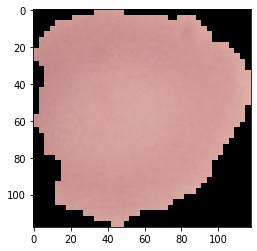

In [8]:
image = plt.imread(image_path)
plt.imshow(image)

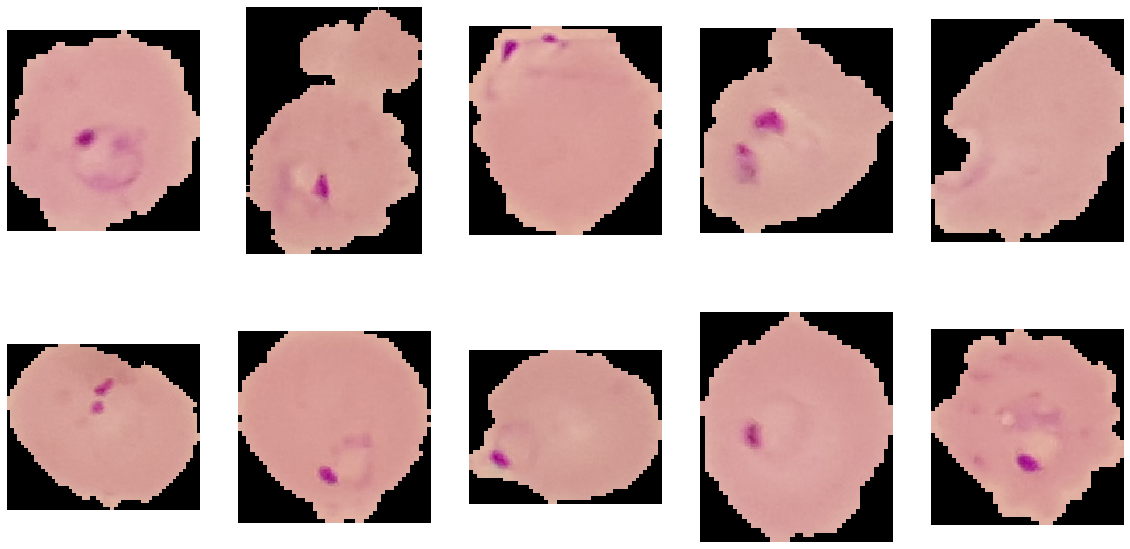

In [9]:
# visualize some images together 
img_names = os.listdir(infected_train_path)[0:10]


plt.figure(figsize = (20, 10))

for i, name in enumerate(img_names):
    image_name = os.path.join(infected_train_path, name)
    image = plt.imread(image_name)
    plt.subplot(2,5 , i+1)
    plt.imshow(image)
    plt.axis("off")
    

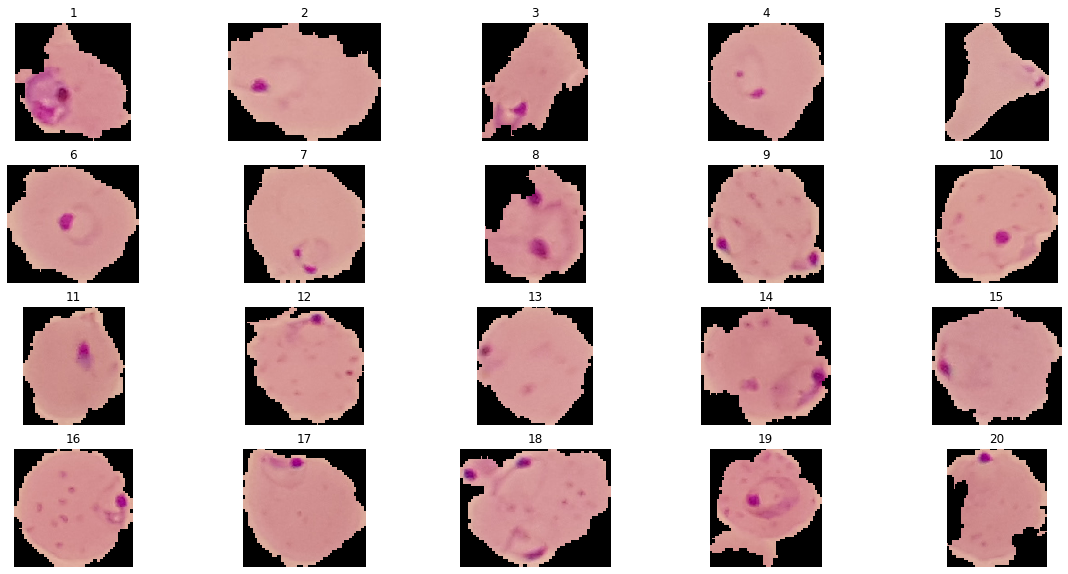

In [10]:
# how to enumerate inside some data 

names = os.listdir(infected_test_path)[:20]

plt.figure(figsize = (20,10))

for i, name in enumerate(names):
    image = os.path.join(infected_test_path, name)
    image = plt.imread(image)
    plt.subplot(4,5, i+1)
    plt.imshow(image)
    plt.title(str(i+1))
    plt.axis("off")
    

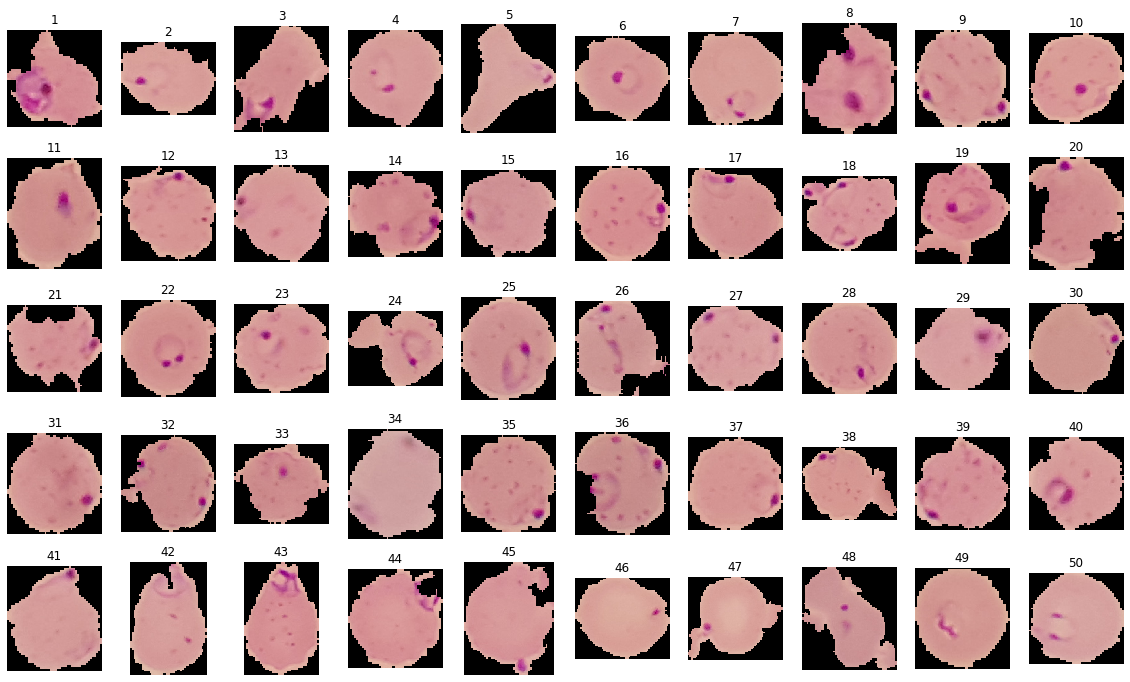

In [11]:
images = os.listdir(infected_test_path)[:50]

plt.figure(figsize = (20,12))

for i , name in enumerate(images):
    image_name = os.path.join(infected_test_path, name)
    image = plt.imread(image_name)
    plt.subplot(5, 10, i+1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(str(i+1))

## checking the image shapes

In [12]:
# how to get the shape that you will use for your model 

dim = []

for name in os.listdir(infected_test_path):
    img_path = os.path.join(infected_test_path, name)
    image = plt.imread(img_path)
    dim.append(image.shape) # appending shape to the list
    
# convert it to a Series 
dimensions = pd.Series(dim)
dimensions.value_counts()

(133, 130, 3)    13
(121, 124, 3)    11
(130, 127, 3)    11
(139, 133, 3)    11
(130, 139, 3)    11
                 ..
(115, 148, 3)     1
(106, 103, 3)     1
(100, 82, 3)      1
(169, 187, 3)     1
(160, 160, 3)     1
Length: 533, dtype: int64

In [13]:
dim_arr = np.array(dim)
w = np.mean(dim_arr[:,0])
h = np.mean(dim_arr[:, 1])

(w,h)

(134.64307692307693, 133.31846153846155)

In [14]:
image_shape = (120, 120)

In [15]:
# calculate number of training samples
train_length = 0

for folder in os.listdir(train_path):
    folder_path = os.path.join(train_path , folder)
    train_length += len(os.listdir(folder_path))
    
print(f'number of training examples is {train_length} images')

number of training examples is 24960 images


In [16]:
# calculate the number of testing images 
test_length = 0

for folder in os.listdir(test_path):
    folder_path = os.path.join(test_path , folder)
    test_length +=  len(os.listdir(folder_path))
    
print(f'number of test samples is {test_length} images')

number of test samples is 2600 images
